In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import seaborn as sns

In [60]:
#load the data from csv files into pandas Dataframes
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [61]:
print("train shape:",train.shape)
print("test shape:",test.shape)

train shape: (1460, 81)
test shape: (1459, 80)


In [62]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [64]:
# settings to plot data
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10,6)

In [65]:
#getting more info form the train set
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The skew is: 1.8828757597682129


(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

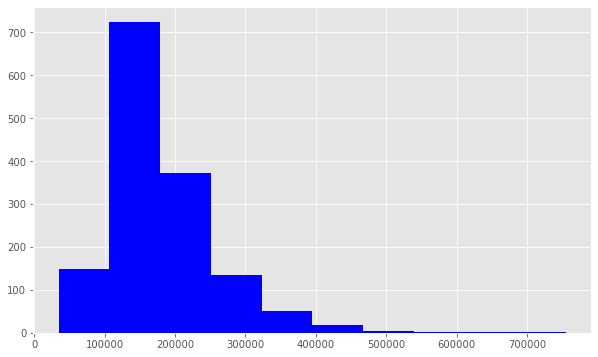

In [66]:
#plot a histogram of the SalesPrice data
print("The skew is:",train.SalePrice.skew())
plt.hist(train.SalePrice,color='blue')

The new skew is : 0.12133506220520406


(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <BarContainer object of 10 artists>)

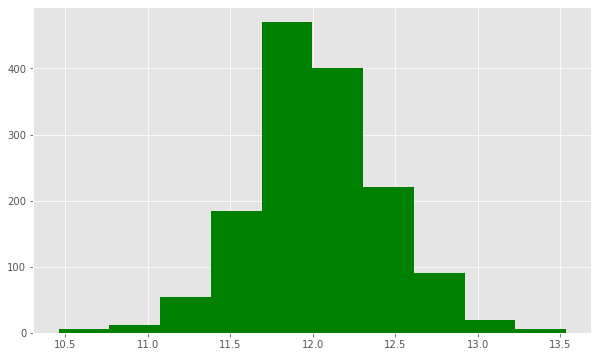

In [67]:
# We are going to use log scale to recalculate the skew and replot the data
target = np.log(train.SalePrice)
print("The new skew is :",target.skew())
plt.hist(target,color='green')

In [68]:
# Numeric features
#get a subset of numeric data
numeric_features = train.select_dtypes(include=[np.number])
print(numeric_features.dtypes)

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object


In [69]:
# see if there is any correlation between these numeric features
corr = numeric_features.corr()

In [70]:
print(corr['SalePrice'].sort_values(ascending=False)[:5])
print(corr['SalePrice'].sort_values(ascending=False)[-5:])


SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [71]:
#Let's see if the OverallQual column has unique values
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [72]:
# Relationship between OverallQual and SalePrice
quality_pivot = train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)
print(quality_pivot)

             SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390


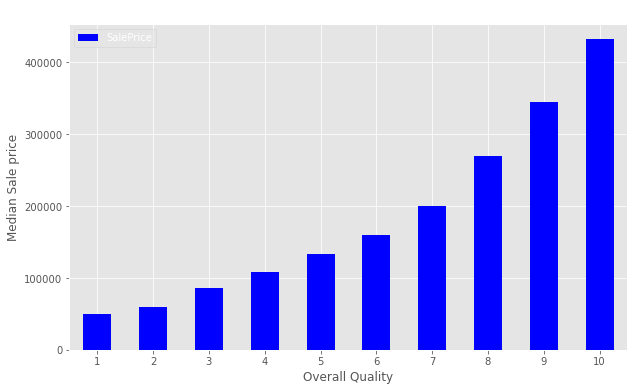

In [73]:
# To visualize this data, we can also create a bar plto
#As the Overall Quality increases, so does the Sale Price
quality_pivot.plot(kind='bar',color='blue')
plt.title('Relationship between Overall Quality and Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale price')
plt.xticks(rotation=0)
plt.show()

In [74]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

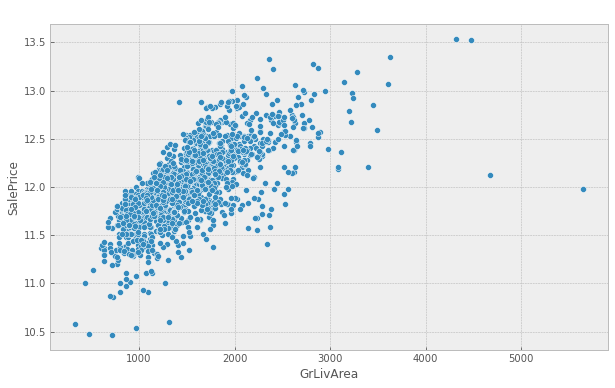

In [89]:
# Relationship between Ground Living Area and Sale Price
# We can also plot this relationship with a scatterplot

plt.style.use("bmh")
ax =sns.scatterplot(x='GrLivArea',y=target,data=train)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

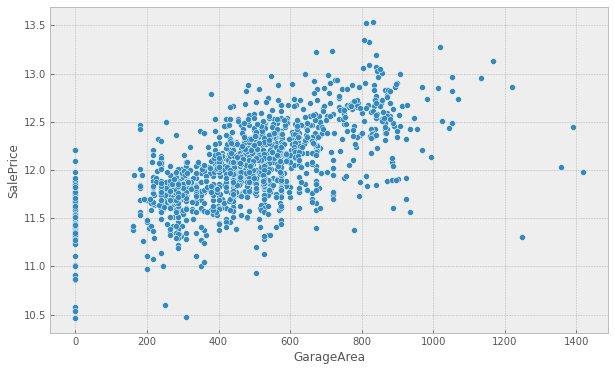

In [90]:
# And we can do the same with the GarageArea column
sns.scatterplot(x='GarageArea',y=target,data=train)

(-200.0, 1600.0)

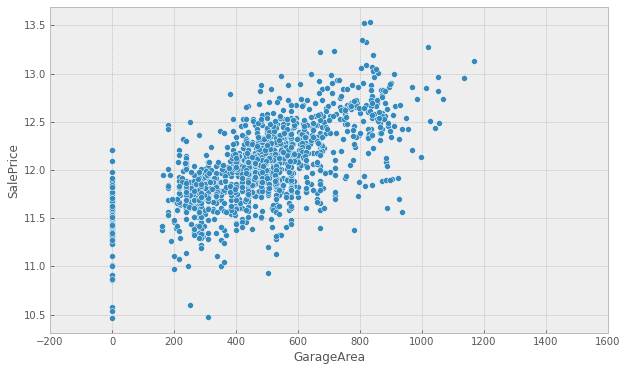

In [93]:
# As you might be able to see in the previous plots, there are some outliers. Therefore, we are going to create a new dataframe and remove some of them
#For example, we could remove the outliers from GarageArea >1200
train = train[train['GarageArea']<1200]
#Now we are going to make a scatterplot again to see the differences
sns.scatterplot(x='GarageArea',y=np.log(train.SalePrice),data=train)
plt.xlim(-200,1600) #to keep the same scale as before


In [105]:
# Null values
# we're going to create a new Dataframe called nulls, and store how many null values does each column have, sorting them to see which columns have more null values.
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls.head()

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689


In [107]:
# Non numeric features
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [108]:
# As the model needs nuerical data, we will be using one-hot encoding to transform the data into boolean columns
# For example, if we take a look at the Street column values
print("Street column original values")
print(train.Street.value_counts())

Street column original values
Pave    1450
Grvl       5
Name: Street, dtype: int64


In [109]:
#So we're going to apply this encoding for the train and test set, with a new column called enc_street
train['enc_street'] = pd.get_dummies(train['Street'],drop_first=True)
test['enc_street'] = pd.get_dummies(train['Street'],drop_first=True)

In [110]:
print("Street column values encoded")
print(train.enc_street.value_counts())

Street column values encoded
1    1450
0       5
Name: enc_street, dtype: int64


<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

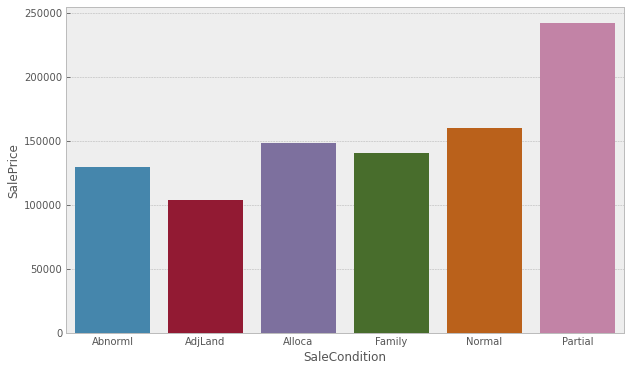

In [119]:
#Moving on, we can also take a look at the relationship between SaleCondition and salePrice, just like we did with OverallQuall.
#In order to do so, we create another pivot_table

condition_pivot = train.pivot_table(index='SaleCondition',values='SalePrice',aggfunc=np.median)
sns.barplot(x=condition_pivot.index,y='SalePrice',data=condition_pivot)

In [121]:
#Similarly to the way we encoded Street, we are going to encode SaleCondition
def encode(x): return 1 if x=='Partial' else 0
train['enc_condition'] = train['SaleCondition'].apply(encode)
test['enc_condition'] = test['SaleCondition'].apply(encode)

<AxesSubplot:xlabel='enc_condition', ylabel='SalePrice'>

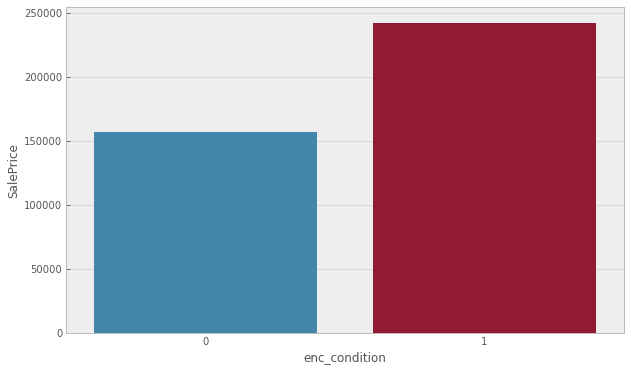

In [124]:
#Now, we plot the modified feature
condition_pivot = train.pivot_table(index='enc_condition',values='SalePrice',aggfunc=np.median)
sns.barplot(x=condition_pivot.index,y='SalePrice',data=condition_pivot)

In [127]:
# Dealing with missing values
# We are going to fill the missing values with an average value (interpolation)
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
#Now we check if all columns have 0 null values
print(sum(data.isnull().sum()!=0))

0


In [129]:
# Building a Linear Model
# In order to build our Linear Model, we need to separate the features and the target variable
# Our target variable will be Sales Price, assigned to y
y = np.log(train['SalePrice'])
X = data.drop(['SalePrice','Id'],axis=1)

#Now we split our data,
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.33,random_state=42)

In [134]:
#Linear Regression model
lr_model = LinearRegression()

#Model Fitting
lr_model.fit(X_train,y_train)

LinearRegression()

In [136]:
# The r2 is quite useful to mesuare how close the data is to the fitted regression line (the closer it is to 1, the better)
print("R2 score is :\n",lr_model.score(X_test,y_test))

R2 score is :
 0.8882477709262486


In [188]:
#Model Predictions
predictions = lr_model.predict(X_test)

In [189]:
#RMSE
print('RMSE is:\n',mean_squared_error(y_test,predictions))

RMSE is:
 0.017841794519568636


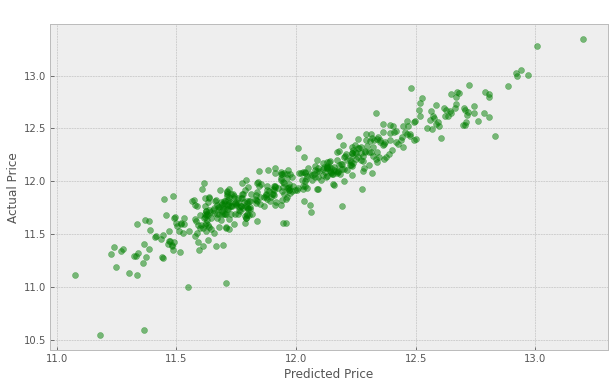

In [190]:
# Relationship between the actual values and the predicted values
# We can graphically see this with a scatter plot
actual_values = y_test
t=np.arange(2)
plt.scatter(predictions, actual_values, alpha=.50,
            color='g')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()



In [191]:
# Improving the model
#We could use Ridge Regularization, so as to decrease the influce of less important features



C:\Users\Facundo Cuzziol\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.34738e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


R2 is: 0.888247773375483
 RMSE is:0.017841794128536297


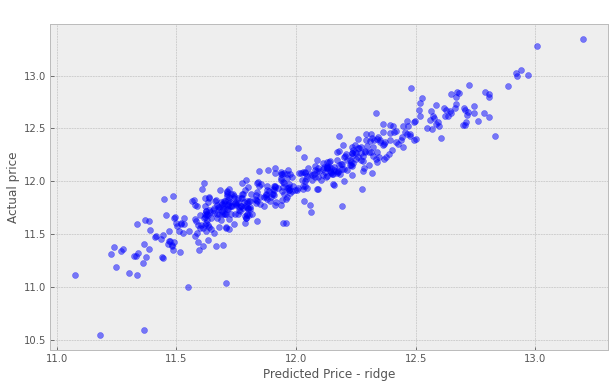

R2 is: 0.8882477954172423
 RMSE is:0.01784179060946072


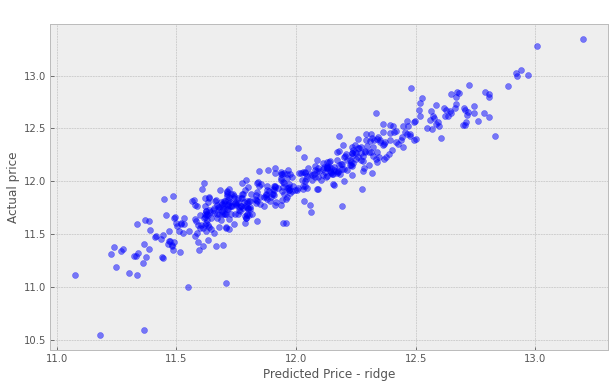

R2 is: 0.8882480157032789
 RMSE is:0.017841755439708538


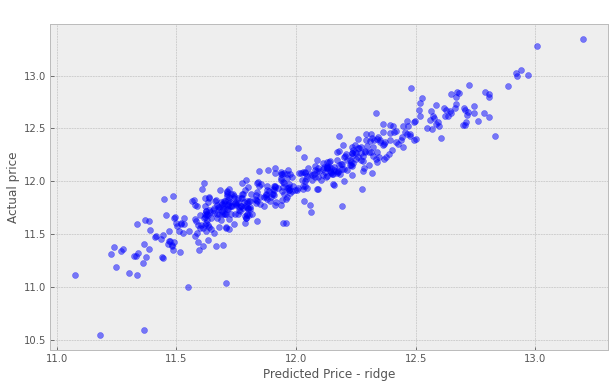

R2 is: 0.8882502054625286
 RMSE is:0.017841405833844706


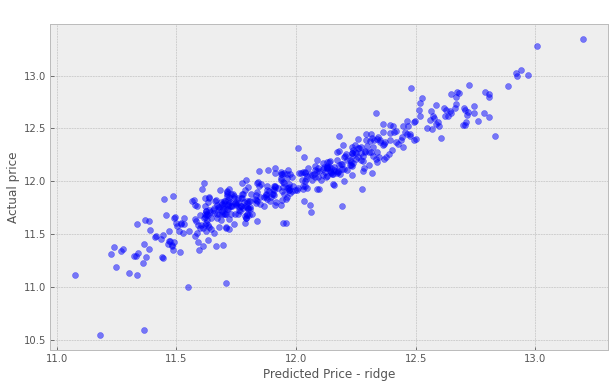

R2 is: 0.8882708454427817
 RMSE is:0.017838110559203525


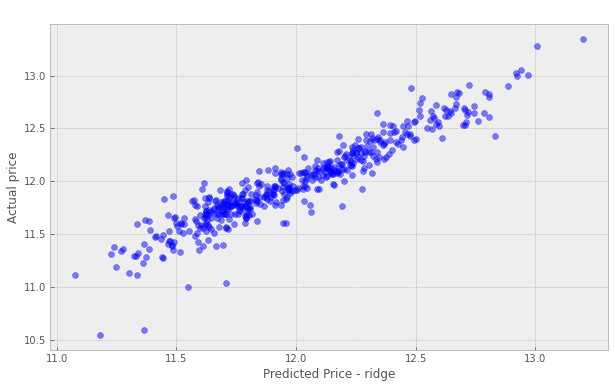

R2 is: 0.8883895157388397
 RMSE is:0.017819164261170875


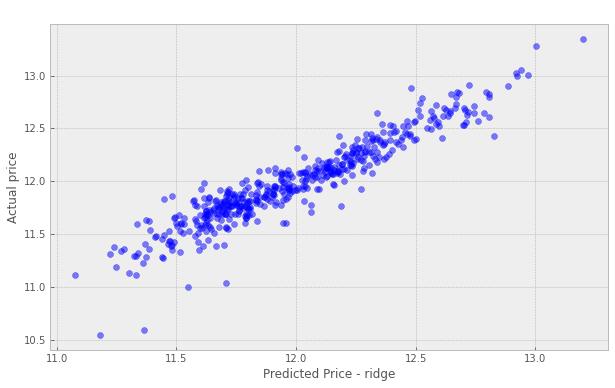

R2 is: 0.8882059630313931
 RMSE is:0.017848469356173614


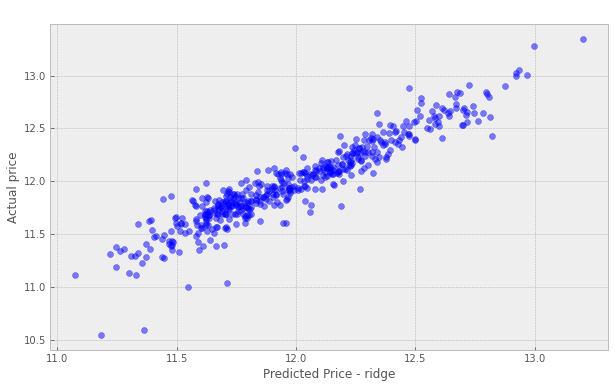

R2 is: 0.8869291173077206
 RMSE is:0.018052324073200506


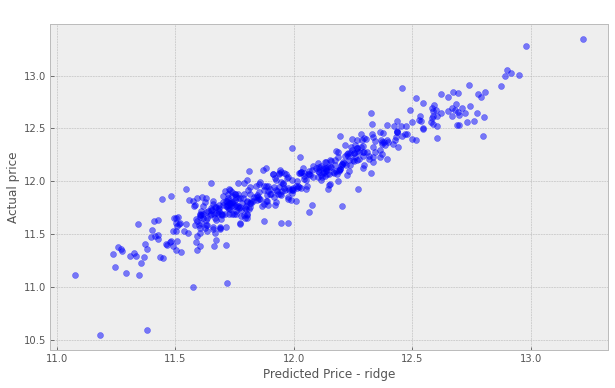

R2 is: 0.8729038419471364
 RMSE is:0.020291528455412572


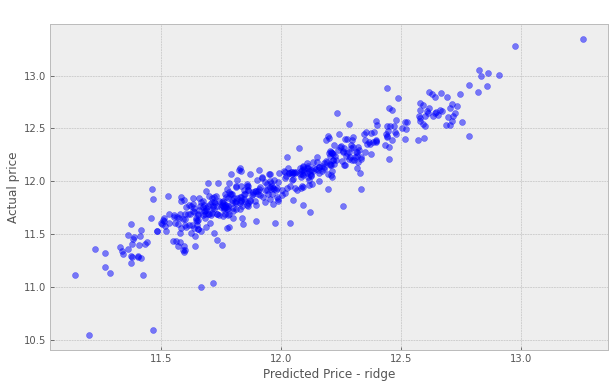

R2 is: 0.8453562375178963
 RMSE is:0.0246896393638625


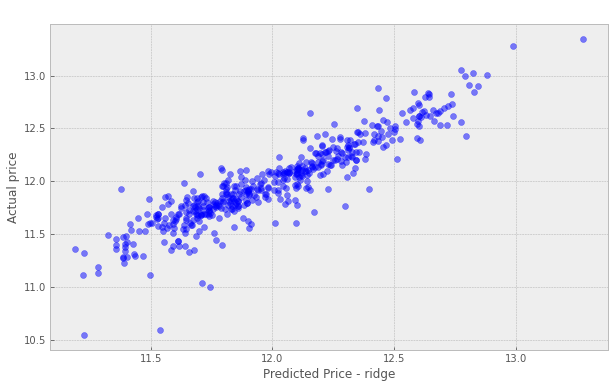

In [192]:
for i in range(-5,5):
    alpha=10**i
    rm = Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train,y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge,actual_values,alpha=.50, color='b')
    plt.xlabel('Predicted Price - ridge')
    plt.ylabel('Actual price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    print('R2 is: {}\n RMSE is:{}'.format(ridge_model.score(X_test,y_test),mean_squared_error(y_test,preds_ridge)))
    plt.show()

In [193]:
# This implementation performed almost identically to the first one, without Ridge. Therefore, adjusting the alpha did not substantially improve our model
print("R^2 is: \n", lr_model.score(X_test, y_test))

R^2 is: 
 0.8882477709262486


In [210]:
# Submission for Kaggle
submission = pd.DataFrame()
submission['Id'] = test['Id']
#We made predictions for the train data. Now we do the same, but with the test data
# Select the features from the test data for the model
features_test = test.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()

#making predictions
predictions = lr_model.predict(features_test)

#As we have worked with logarithm previously, we need to revert those changes, using np.exp()
final_predictions = np.exp(predictions)

In [211]:
submission['Id'].shape

(1459,)

In [212]:
# Predictions differences
print("Original predictions: \n",predictions[:10])
print("Final predictions: \n",final_predictions[:10])

Original predictions: 
 [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655 12.05709882
 12.16036698 12.01665734 12.17126892 11.66318882]
Final predictions: 
 [128959.49172585 122920.74024355 175704.82598102 200050.83263756
 182075.46986405 172318.33397533 191064.62164201 165488.55901671
 193158.99133192 116214.02546462]


In [213]:
final_predictions.shape

(1459,)

In [214]:
submission['SalePrice'] = final_predictions

In [215]:
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [216]:
#export to a .csv file. We don't want a new index, so we set index=False
submission.to_csv('submission1.csv',index=False)